# **Project Name**    - CreditCard Default Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member 1 -** Md Ismail Quraishi

# **Project Summary -**

Customer default predicton is  extremly important for banking sectors as it identifies the customers who are likely to not pay the installments or principal.
In banking industry customers are not able to pay the installments but still they ask for loan, later if they do not able to repay the loan money then it will be a big lose to the banking business and economy. In this problem we will analysis the customer's data and build a machine learning model which can automatically predict who all the customers are default and in future will not able to repay the loan amount.

# **GitHub Link -**

https://github.com/mdismailquraishicse/capstone_project_3_claffication_creditcard_default

# **Problem Statement**


**Avoid giving loans to those customers who are not able to repay the installments in future**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,precision_score,recall_score,roc_auc_score,f1_score
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.ensemble import IsolationForest
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn import metrics
import warnings
from sklearn.ensemble import IsolationForest

warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Load Dataset
path = '/content/drive/MyDrive/Almabetter/Cohort Nilgiri/Capstone Project/Classification/creditcard default predictons/default of credit card clients.xls'
default_df = pd.read_excel(path)

### Dataset First View

In [4]:
# Dataset First Look
default_df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
default_df.shape

(30001, 25)

### Dataset Information

In [6]:
# Dataset Info
default_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30001 non-null  object
 1   X1          30001 non-null  object
 2   X2          30001 non-null  object
 3   X3          30001 non-null  object
 4   X4          30001 non-null  object
 5   X5          30001 non-null  object
 6   X6          30001 non-null  object
 7   X7          30001 non-null  object
 8   X8          30001 non-null  object
 9   X9          30001 non-null  object
 10  X10         30001 non-null  object
 11  X11         30001 non-null  object
 12  X12         30001 non-null  object
 13  X13         30001 non-null  object
 14  X14         30001 non-null  object
 15  X15         30001 non-null  object
 16  X16         30001 non-null  object
 17  X17         30001 non-null  object
 18  X18         30001 non-null  object
 19  X19         30001 non-null  object
 20  X20   

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
default_df.duplicated().value_counts()

False    30001
dtype: int64

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
# function to calculate the number of null values
def null_calculator(df):
  try:
    result = {}
    for col in df.columns:
      result[col] = len(df[df[col].isna() == True])
    return result
  except:
    print('Invalid input')


null_calculator(default_df)

{'Unnamed: 0': 0,
 'X1': 0,
 'X2': 0,
 'X3': 0,
 'X4': 0,
 'X5': 0,
 'X6': 0,
 'X7': 0,
 'X8': 0,
 'X9': 0,
 'X10': 0,
 'X11': 0,
 'X12': 0,
 'X13': 0,
 'X14': 0,
 'X15': 0,
 'X16': 0,
 'X17': 0,
 'X18': 0,
 'X19': 0,
 'X20': 0,
 'X21': 0,
 'X22': 0,
 'X23': 0,
 'Y': 0}

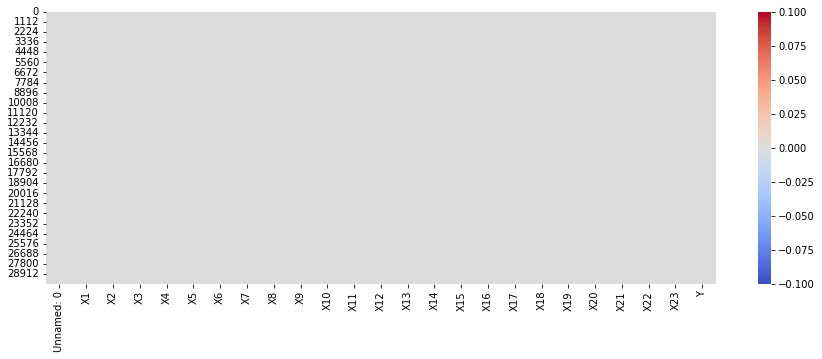

In [9]:
# Visualizing the missing values
# pd.Series(null_calculator(default_df)).plot.pie(autopct='%0.01f%%')
plt.rcParams['figure.figsize'] = (15,5)
sns.heatmap(default_df.isna(),cmap='coolwarm')
plt.show()

### What did you know about your dataset?

The dataset has 30001 rows and 25 columns where first row contains actual name of the columns. The dataset does not have any missing or duplicate value.

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
default_df.columns

Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [11]:
# Dataset Describe
pd.set_option('display.max_columns', None)
default_df.describe()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001
unique,30001,82,3,8,5,57,12,12,12,12,11,11,22724,22347,22027,21549,21011,20605,7944,7900,7519,6938,6898,6940,3
top,ID,50000,2,2,2,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
freq,1,3365,18112,14030,15964,1605,14737,15730,15764,16455,16947,16286,2008,2506,2870,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


### Variables Description 

* 0 - ID of customers
* X1 - Limit of the balance
* X2 - Gender of the customers
* X3 - Qualification of the customers
* X4 - Marital Status
* X5 - Age
* X6,X7,X8,X9,X10,X11 - PAY0,PAY2,PAY3,PAY4,PAY5,PAY6
* X12,X13,X14,X15,X16,X17 - BILL_AMT1 to BILL_AMT6
* X18,X19,X20,X21,X22,X23 - PAY_AMT1 to PAT_AMT6
* Y - Target variable that is next month default predicted customers.

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
print('Number of unique values for each variable is :')
default_df.nunique()

Number of unique values for each variable is :


Unnamed: 0    30001
X1               82
X2                3
X3                8
X4                5
X5               57
X6               12
X7               12
X8               12
X9               12
X10              11
X11              11
X12           22724
X13           22347
X14           22027
X15           21549
X16           21011
X17           20605
X18            7944
X19            7900
X20            7519
X21            6938
X22            6898
X23            6940
Y                 3
dtype: int64

In [13]:
# Unique values
for col in default_df.columns:
  print(col,' : ',default_df[col].unique())

Unnamed: 0  :  ['ID' 1 2 ... 29998 29999 30000]
X1  :  ['LIMIT_BAL' 20000 120000 90000 50000 500000 100000 140000 200000 260000
 630000 70000 250000 320000 360000 180000 130000 450000 60000 230000
 160000 280000 10000 40000 210000 150000 380000 310000 400000 80000 290000
 340000 300000 30000 240000 470000 480000 350000 330000 110000 420000
 170000 370000 270000 220000 190000 510000 460000 440000 410000 490000
 390000 580000 600000 620000 610000 700000 670000 680000 430000 550000
 540000 1000000 530000 710000 560000 520000 750000 640000 16000 570000
 590000 660000 720000 327680 740000 800000 760000 690000 650000 780000
 730000]
X2  :  ['SEX' 2 1]
X3  :  ['EDUCATION' 2 1 3 5 4 6 0]
X4  :  ['MARRIAGE' 1 2 3 0]
X5  :  ['AGE' 24 26 34 37 57 29 23 28 35 51 41 30 49 39 40 27 47 33 32 54 58 22
 25 31 46 42 43 45 56 44 53 38 63 36 52 48 55 60 50 75 61 73 59 21 67 66
 62 70 72 64 65 71 69 68 79 74]
X6  :  ['PAY_0' 2 -1 0 -2 1 3 4 8 7 5 6]
X7  :  ['PAY_2' 2 0 -1 -2 3 5 7 4 1 6 8]
X8  :  ['PAY_3' 

## 3. ***Data Wrangling***

### Data Wrangling Code

In [14]:
# Write your code to make your dataset analysis ready.

# Making a class for data wrangling
class DefaultWrangling:
  # columns to rename
  renameCols = {"Unnamed: 0" : 'ID', 'X1':'LIMIT_BAL','X2':'SEX','X3':'EDUCATION','X4':'MARRIAGE','X5':'AGE',
            'X6':'PAY_0','X7':'PAY_2','X8':'PAY_3','X9':'PAY_4','X10':'PAY_5','X11':'PAY_6',
          'X12':'BILL_AMT1','X13':'BILL_AMT2','X14':'BILL_AMT3','X15':'BILL_AMT4','X16':'BILL_AMT5','X17':'BILL_AMT6',
          'X18':'PAY_AMT1','X19':'PAY_AMT2','X20':'PAY_AMT3','X21':'PAY_AMT4','X22':'PAY_AMT5','X23':'PAY_AMT6','Y':'default'}

  # Init method
  def __init__(self,df):
    self.df = df.copy()
    self.df.rename(columns=self.renameCols,inplace = True)
    self.df = self.df[ self.df['ID'] != 'ID']
    print('New columns :')
    print(list(self.df.columns))
    for col in self.df.columns:
      self.df[col] = self.df[col].apply(self.objectToInt)
    self.df1 = self.makeTotalBillAndPaidAmt()

  # Method to convert columns into int type
  def objectToInt(self,col):
    return int(col)

  # Method to make columns total_bill_amt and total_paid_amt
  def makeTotalBillAndPaidAmt(self):
    df1 = self.df.copy()
    df1['total_bill_amt'] = df1['BILL_AMT1'] + df1['BILL_AMT2']+ df1['BILL_AMT3']+ df1['BILL_AMT4']+ df1['BILL_AMT5']+ df1['BILL_AMT6']
    df1['total_paid_amt'] = df1['PAY_AMT1'] + df1['PAY_AMT2'] + df1['PAY_AMT3'] + df1['PAY_AMT4'] + df1['PAY_AMT5'] + df1['PAY_AMT6']
    for i in range(1,7):
      df1.drop(columns=['BILL_AMT'+str(i)],inplace=True)
      df1.drop(columns=['PAY_AMT'+str(i)],inplace=True)
    return df1

  # Method to get counts of default and non default
  def getDefaultAndNonDefaultCounts(self):
    return self.df1['default'].value_counts()

  # Method to get default data frame
  def getDefaultDF(self):
    return self.df1[self.df1['default']==1]

  # Method to get count of customers and default for a given column
  def getDefaultCountsByCol(self,col):
    df  = self.df1.copy()
    df2 = df.groupby(col)['default'].sum().reset_index()
    df2['customers'] = df.groupby(col)['default'].count().reset_index()['default']
    df2['%_default'] = round(df2['default']/df2['customers'],4)*100
    return df2


# Initializing the object
defaultWrangling = DefaultWrangling(default_df)

New columns :
['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default']


In [15]:
# Count of default and non default
defaultWrangling.getDefaultAndNonDefaultCounts()

0    23364
1     6636
Name: default, dtype: int64

In [16]:
# Number of defaults and customers for each catagories of sex
defaultWrangling.getDefaultCountsByCol('SEX')

,SEX,default,customers,%_default
0,1,2873,11888,24.17
1,2,3763,18112,20.78


In [17]:
# Number of defaults and customers for each catagories of Education
defaultWrangling.getDefaultCountsByCol('EDUCATION')

,EDUCATION,default,customers,%_default
0,0,0,14,0.00
1,1,2036,10585,19.23
2,2,3330,14030,23.73
3,3,1237,4917,25.16
4,4,7,123,5.69
5,5,18,280,6.43
6,6,8,51,15.69


In [18]:
# Number of defaults and customers for each catagories of Marriage
defaultWrangling.getDefaultCountsByCol('MARRIAGE')

,MARRIAGE,default,customers,%_default
0,0,5,54,9.26
1,1,3206,13659,23.47
2,2,3341,15964,20.93
3,3,84,323,26.01


In [19]:
# Number of defaults for each catagories of AGE - Top 10
defaultWrangling.getDefaultCountsByCol('AGE').sort_values(by='default',ascending=False).head(10)

,AGE,default,customers,%_default
6,27,313,1477,21.19
8,29,313,1605,19.50
4,25,302,1186,25.46
3,24,300,1127,26.62
7,28,286,1409,20.30
9,30,274,1395,19.64
15,36,254,1108,22.92
5,26,253,1256,20.14
2,23,247,931,26.53
13,34,231,1162,19.88


In [20]:
# Number of defaults for each catagories of PAY_0
defaultWrangling.getDefaultCountsByCol('PAY_0').sort_values(by='default',ascending=False)

,PAY_0,default,customers,%_default
2,0,1888,14737,12.81
4,2,1844,2667,69.14
3,1,1252,3688,33.95
1,-1,954,5686,16.78
0,-2,365,2759,13.23
5,3,244,322,75.78
6,4,52,76,68.42
7,5,13,26,50.00
10,8,11,19,57.89
9,7,7,9,77.78


In [21]:
# Number of defaults for each catagories of PAY_2
defaultWrangling.getDefaultCountsByCol('PAY_2').sort_values(by='default',ascending=False)

,PAY_2,default,customers,%_default
2,0,2503,15730,15.91
4,2,2184,3927,55.61
1,-1,966,6050,15.97
0,-2,691,3782,18.27
5,3,201,326,61.66
6,4,50,99,50.51
7,5,15,25,60.00
9,7,12,20,60.00
8,6,9,12,75.00
3,1,5,28,17.86


In [22]:
# Number of defaults for each catagories of PAY_3
defaultWrangling.getDefaultCountsByCol('PAY_3').sort_values(by='default',ascending=False)

,PAY_3,default,customers,%_default
2,0,2751,15764,17.45
4,2,1969,3819,51.56
1,-1,926,5938,15.59
0,-2,757,4085,18.53
5,3,138,240,57.50
6,4,44,76,57.89
9,7,22,27,81.48
8,6,14,23,60.87
7,5,12,21,57.14
10,8,2,3,66.67


In [23]:
# Number of defaults for each catagories of PAY_4
defaultWrangling.getDefaultCountsByCol('PAY_4').sort_values(by='default',ascending=False)

,PAY_4,default,customers,%_default
2,0,3016,16455,18.33
4,2,1653,3159,52.33
1,-1,904,5687,15.90
0,-2,837,4348,19.25
5,3,110,180,61.11
9,7,48,58,82.76
6,4,46,69,66.67
7,5,18,35,51.43
8,6,2,5,40.00
3,1,1,2,50.00


In [24]:
# Number of defaults for each catagories of PAY_5
defaultWrangling.getDefaultCountsByCol('PAY_5').sort_values(by='default',ascending=False)

,PAY_5,default,customers,%_default
2,0,3195,16947,18.85
3,2,1423,2626,54.19
1,-1,897,5539,16.19
0,-2,895,4546,19.69
4,3,113,178,63.48
5,4,51,84,60.71
8,7,48,58,82.76
6,5,10,17,58.82
7,6,3,4,75.00
9,8,1,1,100.00


In [25]:
# Number of defaults for each catagories of PAY_6
defaultWrangling.getDefaultCountsByCol('PAY_6').sort_values(by='default',ascending=False)

,PAY_6,default,customers,%_default
2,0,3069,16286,18.84
3,2,1401,2766,50.65
0,-2,981,4895,20.04
1,-1,975,5740,16.99
4,3,118,184,64.13
8,7,38,46,82.61
5,4,31,49,63.27
7,6,14,19,73.68
6,5,7,13,53.85
9,8,2,2,100.00


### What all manipulations have you done and insights you found?

1. First of all I made a class for data wrangling purpose.
2. Then I renamed the columns and dropped the first row.
3. Total number of Default customer is 6636 and non default is 23364.
4. After that I checked number of default for each category of SEX,  EDUCATION, MARRIAGE,   AGE,  PAY_0, PAY_2  to PAY 6.
5. Converted columns from obj to int type.
6. BILL_AMT 0 to 6 and PAY_AMT 0 to 6 are deleted and created new columns total_bill_amt and total_paid_amt.

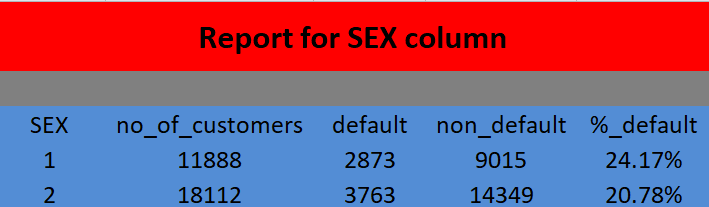

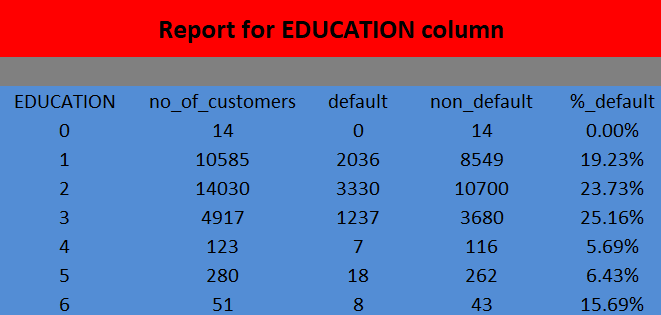

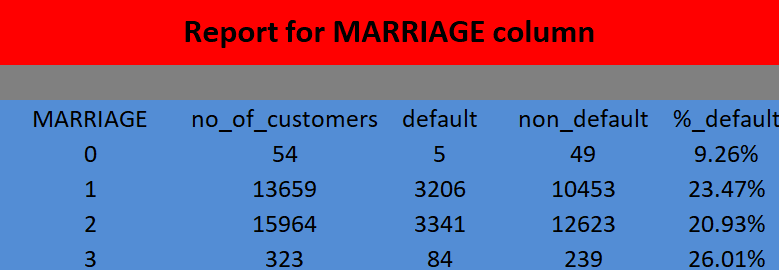

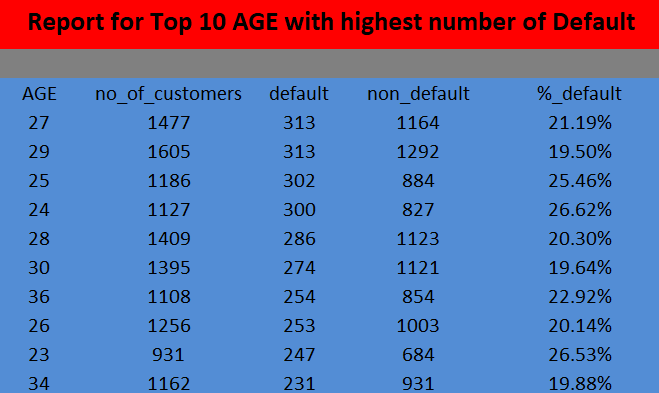

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [26]:
# Class for visualization
class DefaultVisualization(DefaultWrangling):
  # Creating attributes
  uniPie = dict()
  uniPie['color'] = {'pink','cyan'}
  uniPie['explode'] = [.04,.04]
  uniPie['autopct'] = '%0.01f%%'
  barColors = ['violet','indigo','b','g','yellow','orange','r']
  barSize = (18,5)

  # Function for Uni-variate Pie chart
  def getUniPie(self,col,df):
    df[col].value_counts().plot.pie(autopct=self.uniPie['autopct'],
                                    colors=self.uniPie['color'] ,shadow= True,
                                    explode= self.uniPie['explode'])
    plt.show()

  # Function for Uni-variate Bar chart
  def getUniBar(self,col,df):
    df[col].value_counts().plot.bar(color= self.barColors,figsize=self.barSize)
    plt.xlabel(col)
    plt.ylabel('Customers')
    plt.show()

  # Function for Bi-variate bar chart
  def getBiBar(self,col1,col2,df):
    df.groupby(col1)[col2].count().plot.bar(color=self.barColors,figsize=self.barSize)
    plt.title(col1+' VS '+col2)
    plt.xlabel(col1)
    plt.ylabel('Counts')
    plt.show()



# Initializing the object
defaultVisualization = DefaultVisualization(default_df)

New columns :
['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default']


#### Chart - 1 - Pie Chart of Target feature

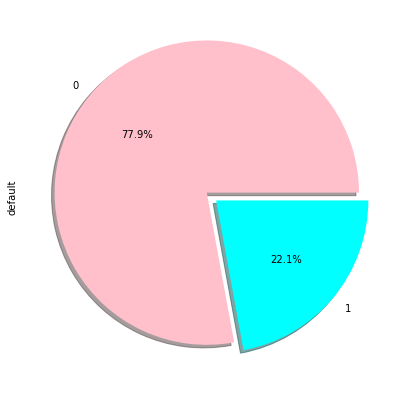

In [27]:
# Chart - 1 visualization code
plt.rcParams['figure.figsize'] = (7,7)
defaultVisualization.getUniPie('default',defaultVisualization.df)

##### 1. Why did you pick the specific chart?

A pie chart expresses the part to whole relationship with the data. I picked this chart to see percentage of default and non default data.

##### 2. What is/are the insight(s) found from the chart?

I found that 77.9% of customers are not predicted as default and 22.1% are predicted as default.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insight will help creating a positive business impact while making prediction. Since the dataset is imbalanced therefore it will lead to negative growth.

#### Chart - 2 - Pie chart for sex column

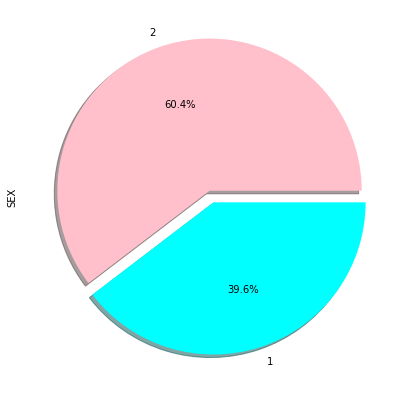

In [28]:
# Chart - 2 visualization code - Percentage of total customers from each category.
defaultVisualization.getUniPie('SEX',defaultVisualization.df)

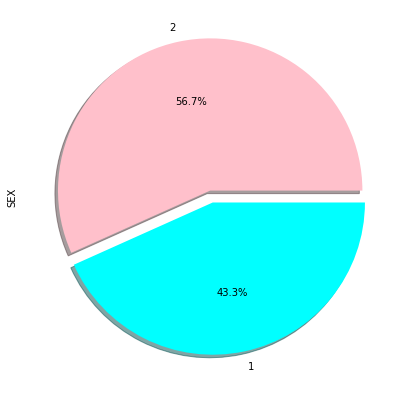

In [29]:
# Percentage of default customers from each category
defaultVisualization.getUniPie('SEX',defaultVisualization.getDefaultDF())

##### 1. Why did you pick the specific chart?

A pie chart expresses part to whole relationship with the data therefore I picked this chart to see percentage of customers for each SEX group.

##### 2. What is/are the insight(s) found from the chart?

I found that 60.4% of customers havs gender 2 and 39.6% of are in gender 1. And 43.3% are default customers from category 1 and 56.7% are default from catagory 2.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes , the gained insights will help creating a positive business while making prediction.

#### Chart - 3 - Bar chart for EDUCATION

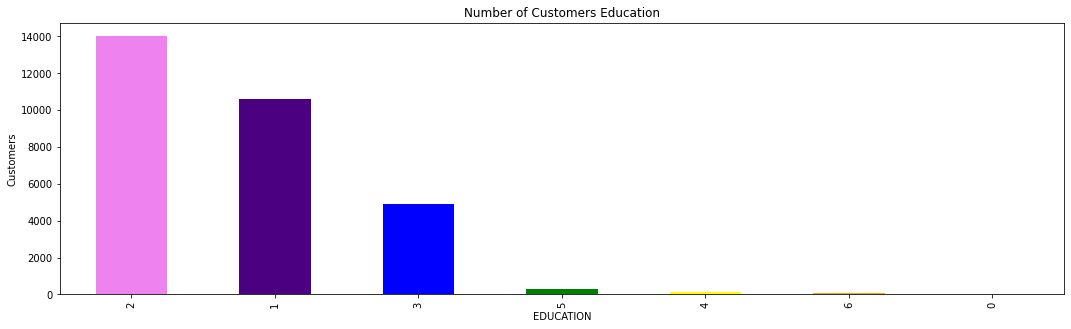

In [30]:
# Chart - 3 visualization code - Number of total customers from each category
plt.title('Number of Customers Education')
defaultVisualization.getUniBar('EDUCATION',defaultVisualization.df)

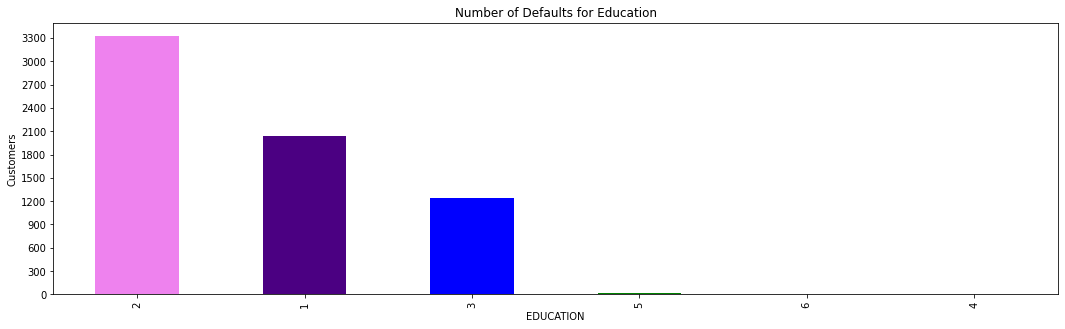

In [31]:
# Number of default customers from each category
plt.yticks(np.arange(0,3301,300))
plt.title('Number of Defaults for Education')
defaultVisualization.getUniBar('EDUCATION',defaultVisualization.getDefaultDF())

##### 1. Why did you pick the specific chart?

A bar chart shows value counts for different variables and I picked this chart to see number of customers for each catagories of education.

##### 2. What is/are the insight(s) found from the chart?

I found that about 14000 customers of catagory 2, approximately 11000 of catagory 1, approximately 6000 for catagory 3 and 0 to 20 for catagories 0,5,6. And from 2nd chart we can see that 2 has more than 3300 customers predicted as default, 1 has more 2100, 3 has about 1500, 5/6/4 has less than 100 customers are predicted as defaulte.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes , the gained insights will help creating a positive business while making prediction.

#### Chart - 4 - Bar chart for Marriage column.

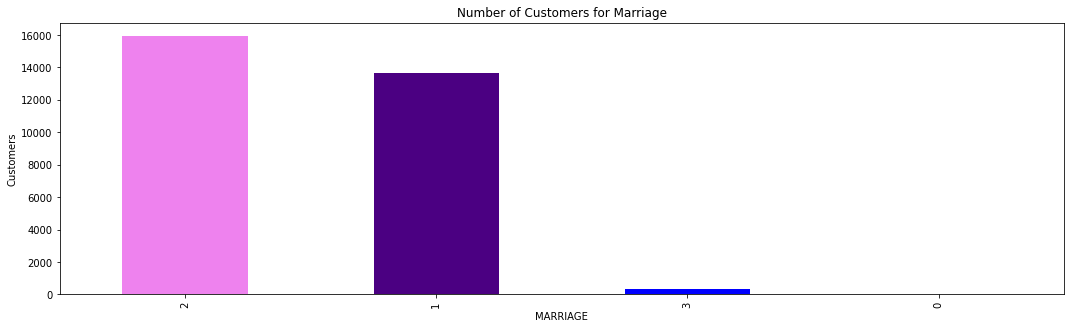

In [32]:
# Chart - 4 visualization code - Number of total customers from each category
plt.title('Number of Customers for Marriage')
defaultVisualization.getUniBar('MARRIAGE',defaultVisualization.df)

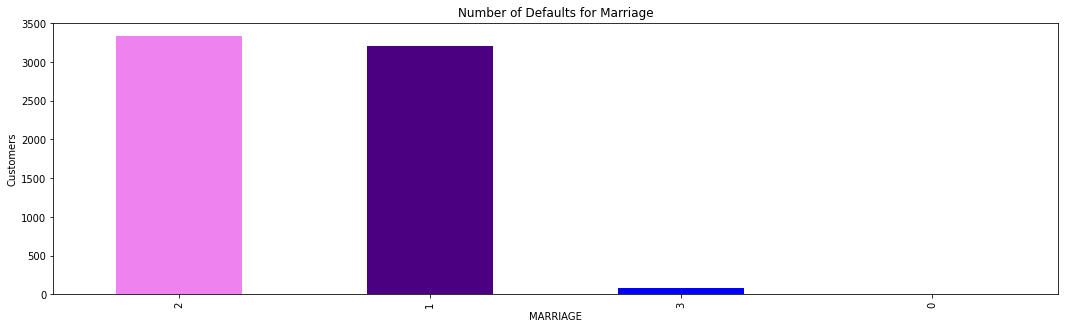

In [33]:
# Number of default customers from each category
plt.title('Number of Defaults for Marriage')
defaultVisualization.getUniBar('MARRIAGE',defaultVisualization.getDefaultDF())

##### 1. Why did you pick the specific chart?

A bar chart shows value counts and frequency of the data so I picked this chart to see number of customers for each marriage type.

##### 2. What is/are the insight(s) found from the chart?

Catagory 1 and 2 have more than 14000 customers, catagory 0 and 3 have just between 0 to 500 customers. And From 2nd chart and and 2 has approximately 3400 default customers for each, 3 and 0 have less than 100 customers predicted as default.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes , the gained insights will help creating a positive business while making prediction.

#### Chart - 5 - Bar chart groupby PAY_0 to PAY_6 with default(bi-variate)

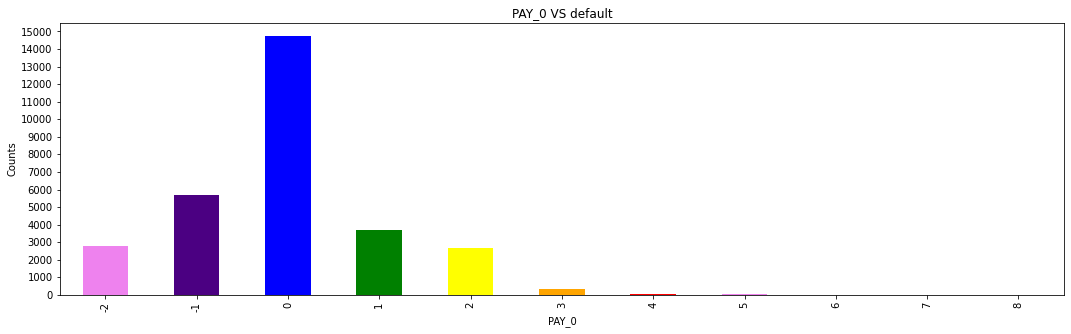

In [34]:
# Chart - 5 visualization code - Number of total customers from each category
plt.yticks(np.arange(0,15001,1000))
defaultVisualization.getBiBar('PAY_0','default',defaultVisualization.df)

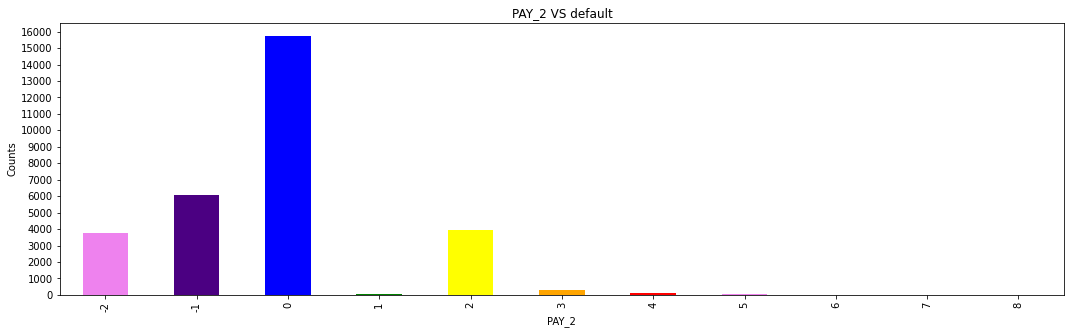

In [35]:
# Number of total customers from each category
plt.yticks(np.arange(0,17000,1000))
defaultVisualization.getBiBar('PAY_2','default',defaultVisualization.df)

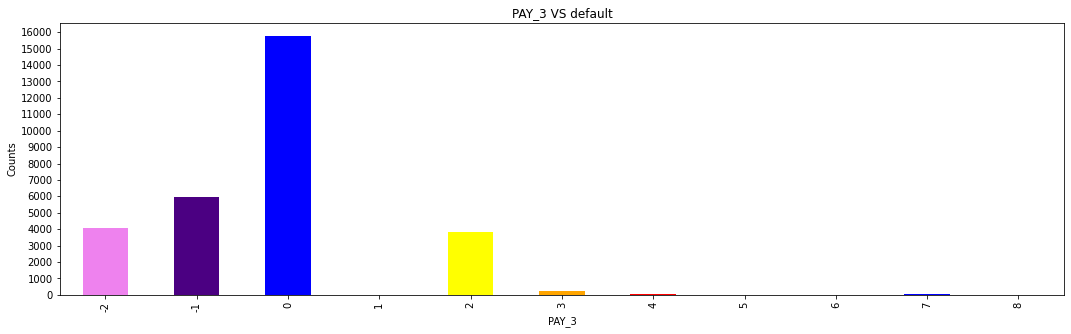

In [36]:
# Number of total customers from each category
plt.yticks(np.arange(0,17000,1000))
defaultVisualization.getBiBar('PAY_3','default',defaultVisualization.df)

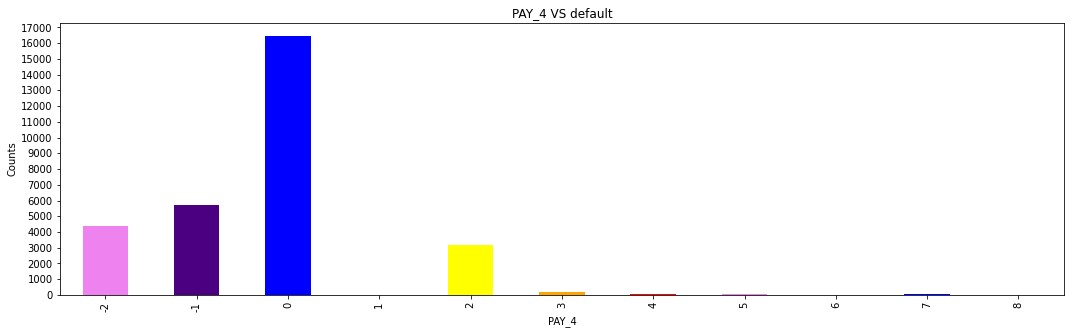

In [37]:
# Number of total customers from each category
plt.yticks(np.arange(0,18000,1000))
defaultVisualization.getBiBar('PAY_4','default',defaultVisualization.df)

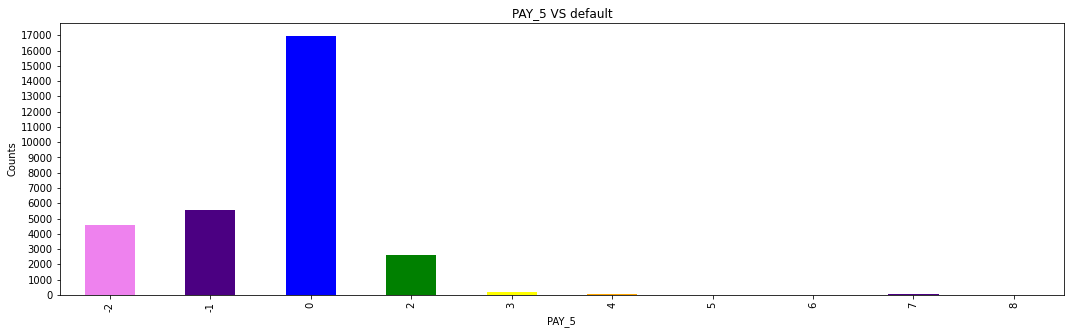

In [38]:
# Number of total customers from each category
plt.yticks(np.arange(0,19000,1000))
defaultVisualization.getBiBar('PAY_5','default',defaultVisualization.df)

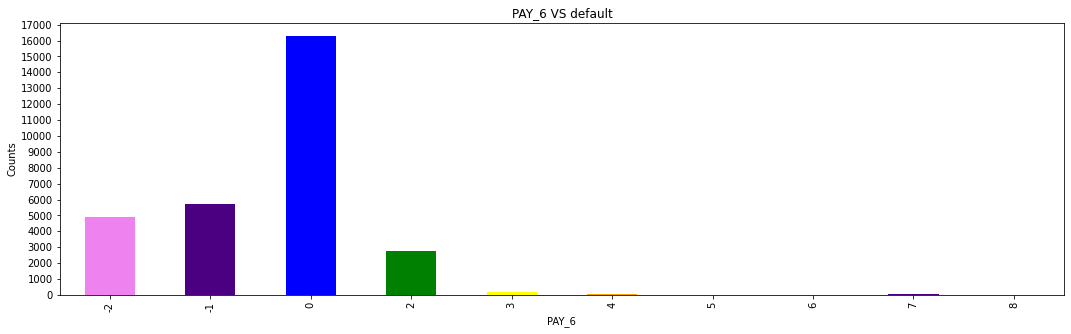

In [39]:
# Number of total customers from each category
plt.yticks(np.arange(0,18000,1000))
defaultVisualization.getBiBar('PAY_6','default',defaultVisualization.df)

##### 1. Why did you pick the specific chart?

A bar chart represents value counts of numbers for catagorical data so I picked this chart to see number of customers who predicted as default for each pay type.

##### 2. What is/are the insight(s) found from the chart?

In most of the case category 0 has more than 16000 or nearly 16000 number of customers, catagory -1 has more than 6000, -2 has more than 4000, 2 has more than 3000, and 3,4,5,6,7,8 have less than 200 number of customers. But in first chart category 1 has about 5000 customers.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes , the gained insights will help creating a positive business while making prediction.

#### Chart - 6 - Bar chart groupby PAY_0 to PAY_6 with default(bi-variate)

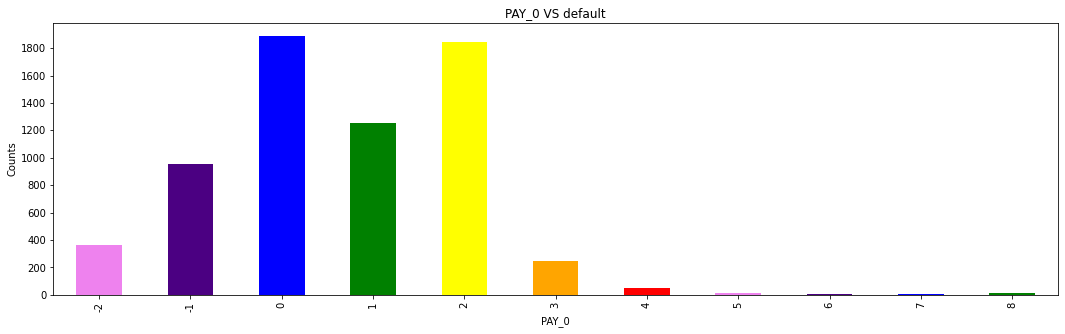

In [40]:
# Chart - 6 visualization code - Percentage of default customers from each category
plt.yticks(np.arange(0,2000,200))
defaultVisualization.getBiBar('PAY_0','default',defaultVisualization.getDefaultDF())

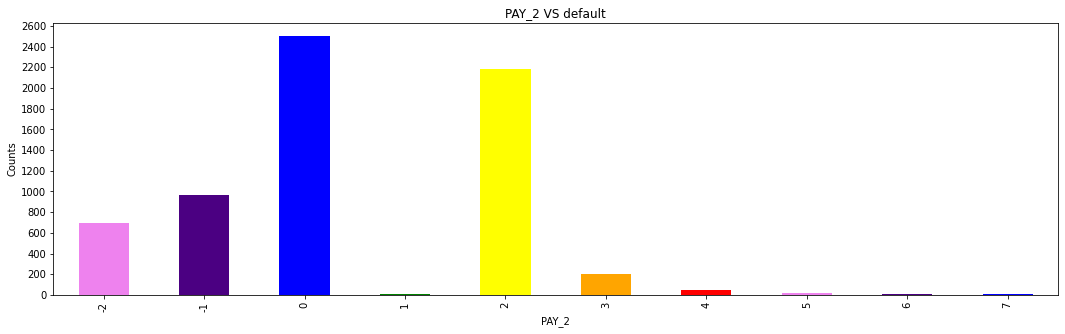

In [41]:
# Percentage of default customers from each category
plt.yticks(np.arange(0,2800,200))
defaultVisualization.getBiBar('PAY_2','default',defaultVisualization.getDefaultDF())

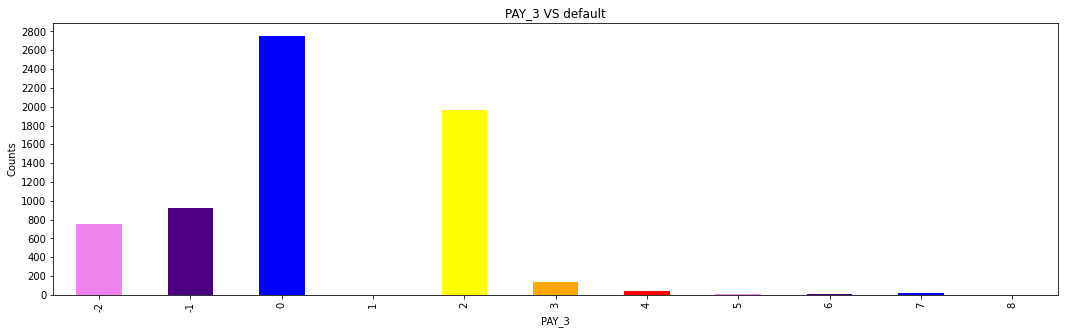

In [42]:
# Percentage of default customers from each category
plt.yticks(np.arange(0,3000,200))
defaultVisualization.getBiBar('PAY_3','default',defaultVisualization.getDefaultDF())

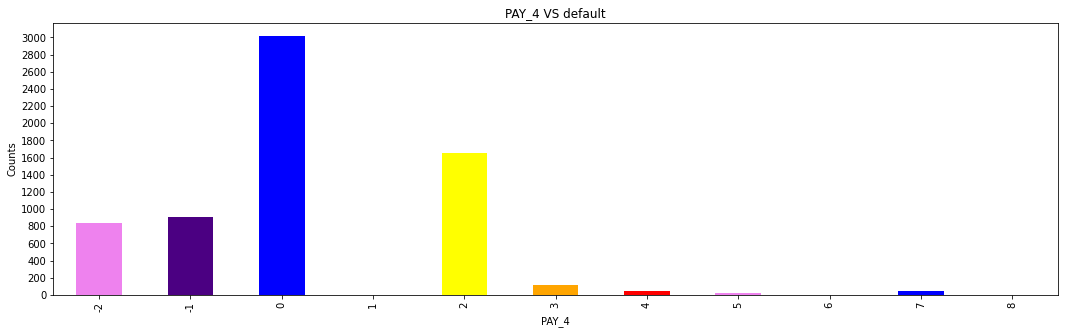

In [43]:
# Percentage of default customers from each category
plt.yticks(np.arange(0,3300,200))
defaultVisualization.getBiBar('PAY_4','default',defaultVisualization.getDefaultDF())

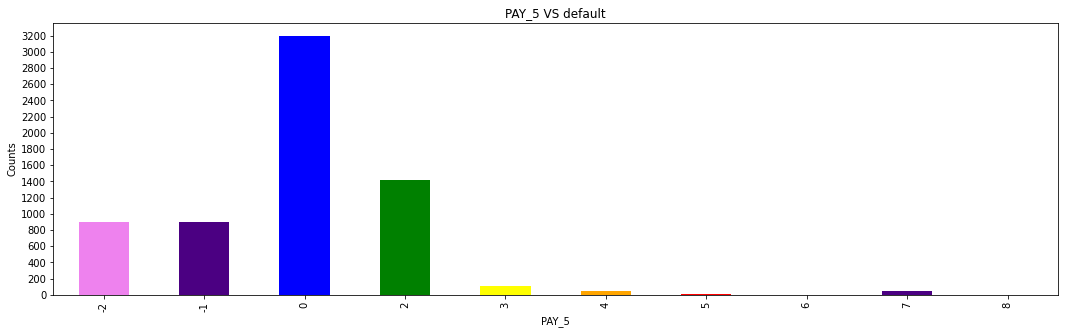

In [44]:
# Percentage of default customers from each category
plt.yticks(np.arange(0,3500,200))
defaultVisualization.getBiBar('PAY_5','default',defaultVisualization.getDefaultDF())

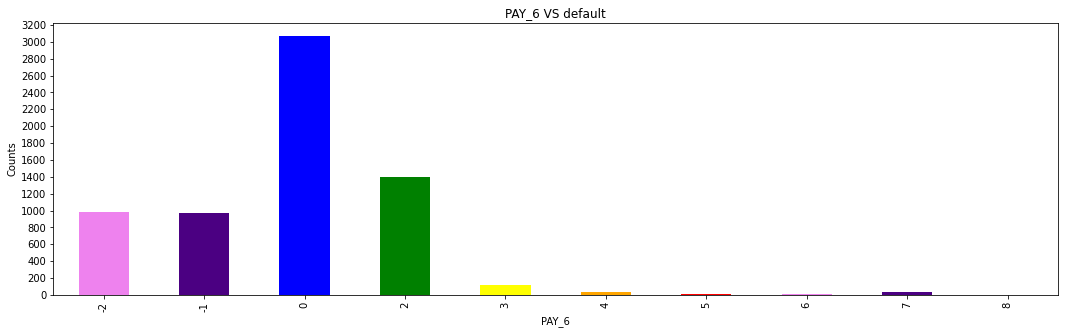

In [45]:
# Percentage of default customers from each category
plt.yticks(np.arange(0,3300,200))
defaultVisualization.getBiBar('PAY_6','default',defaultVisualization.getDefaultDF())

##### 1. Why did you pick the specific chart?

A bar chart represents value counts of numbers for catagorical data so I picked this chart to see number of customers who predicted as default for each pay type.

##### 2. What is/are the insight(s) found from the chart?

Category 0 has highest number of customers predicted as default, category -2,-1 have about 800 customers predected as default in most of the cases, 2 has more than 1400 customers predicted as default in most of the cases, only in chart 1 we found that category 1 has more than 1400 default customers and in rest of the pic number of default is almost 0. Categories 3,4,5,6,7, and 8 have very less number of default customers which is less than 200.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes , the gained insights will help creating a positive business while making prediction.

#### Chart - 7 - Pie groupby default and LIMIT_BAL.

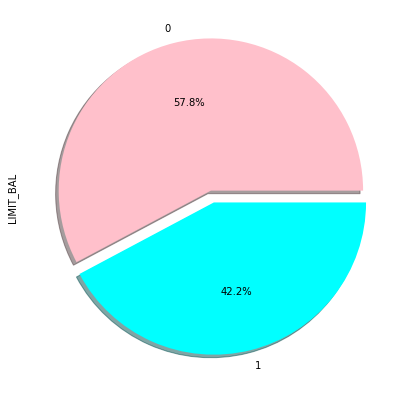

In [46]:
# Chart - 10 visualization code
defaultVisualization.df.groupby(['default'])['LIMIT_BAL'].mean().plot.pie(colors=defaultVisualization.uniPie['color'],
                                                                          autopct='%0.01f%%',
                                                                          explode=defaultVisualization.uniPie['explode'],shadow=True)
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart shows part to whole relationship with the dataset therefore I picked this chart to see percentage of limit_bal for default and non default customers.

##### 2. What is/are the insight(s) found from the chart?

I found that mean limit balance for default customers are 8% lesser than non default customers.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, The gained insight help creating a positive business impact while making prediction.

#### Chart - 9 - Pie chart groupby default and AGE.

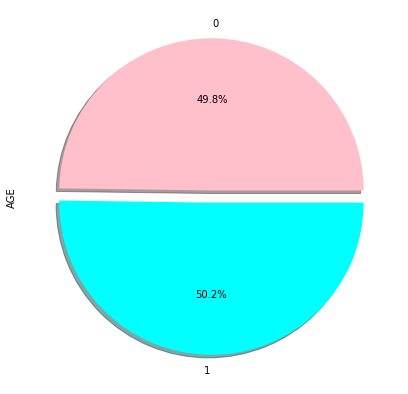

In [47]:
# Chart - 11 visualization code
defaultVisualization.df.groupby(['default'])['AGE'].mean().plot.pie(autopct='%0.01f%%',
                                                                    colors={'pink','cyan'},shadow= True,
                                                                    explode=[0.04,0.04])
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart expresses part-to-whole relationship with data and I picked this chart to see percentage of mean age for defaulter and non defaulter customers.

##### 2. What is/are the insight(s) found from the chart?

I found that mean age for both the case are approximately equal.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

No, the gained insight will not help.

#### Chart - 10 - Pie chart groupby default and Total bill amount.

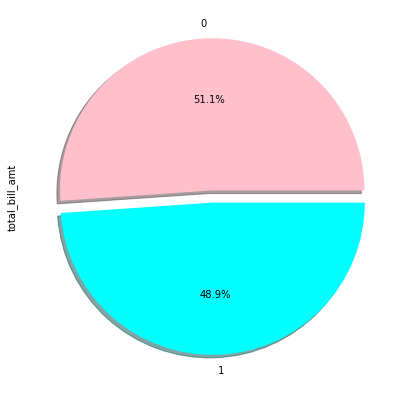

In [48]:
# Chart - 12 visualization code
defaultVisualization.df1.groupby(['default'])['total_bill_amt'].mean().plot.pie(autopct='%0.01f%%',
                                                                                colors={'pink','cyan'},shadow= True,
                                                                                explode=[0.04,0.04])
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart expresses part-to-whole relationship with data and I picked this chart to see percentage of mean of total bill amount for defaulter and non defaulter customers.

##### 2. What is/are the insight(s) found from the chart?

Mean balance percentage for the customers who are defaulter is 48.9% and for non defaulter is 51.1%.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

No, the gained insight will not help.

#### Chart - 11 - Correlation Heatmap

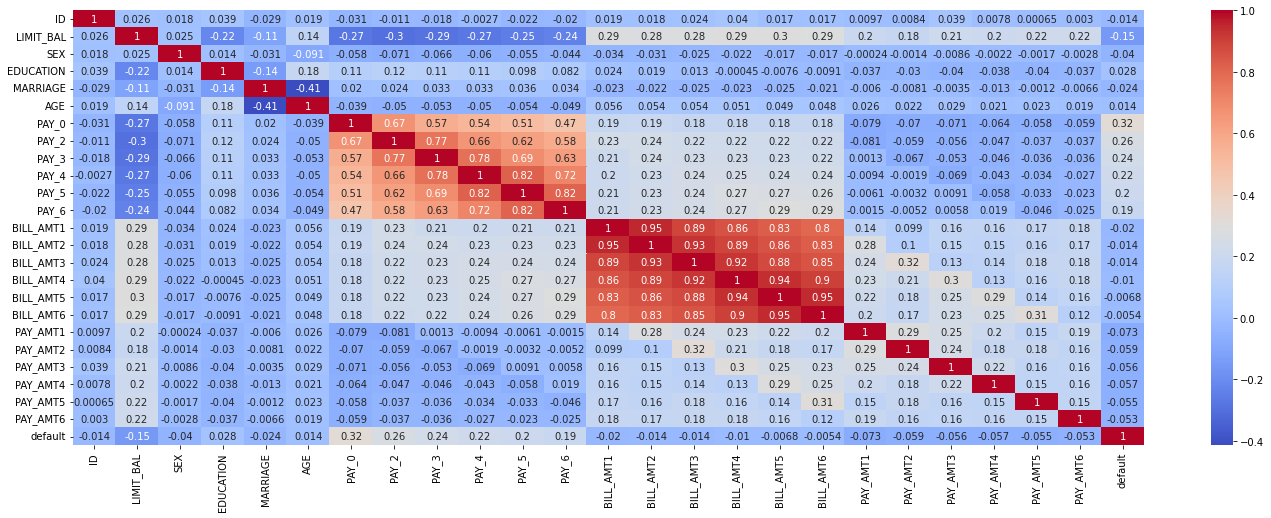

In [49]:
# Correlation Heatmap visualization code
corr = defaultVisualization.df.corr()
plt.rcParams['figure.figsize'] = (24,8)
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

##### 1. Why did you pick the specific chart?

Correlation map shows relationship between variables therefore I picked this chart to see correlations.

##### 2. What is/are the insight(s) found from the chart?

I found that PAY_0,PAY_2,PAY3,PAY_4,PAY_5 and  PAY_6 are highly correlated with each other and also found that BILL_AMT_1,BILL_AMT2,BILL_AMT_3,BILL_AMT_4,BILL_AMT5 and BILL_AMT6 are also highly correlated with each other. Since they are highly correlated with independed variables therefore it is not ideal for Logistic regression.

#### Chart - 12 - Pair Plot 

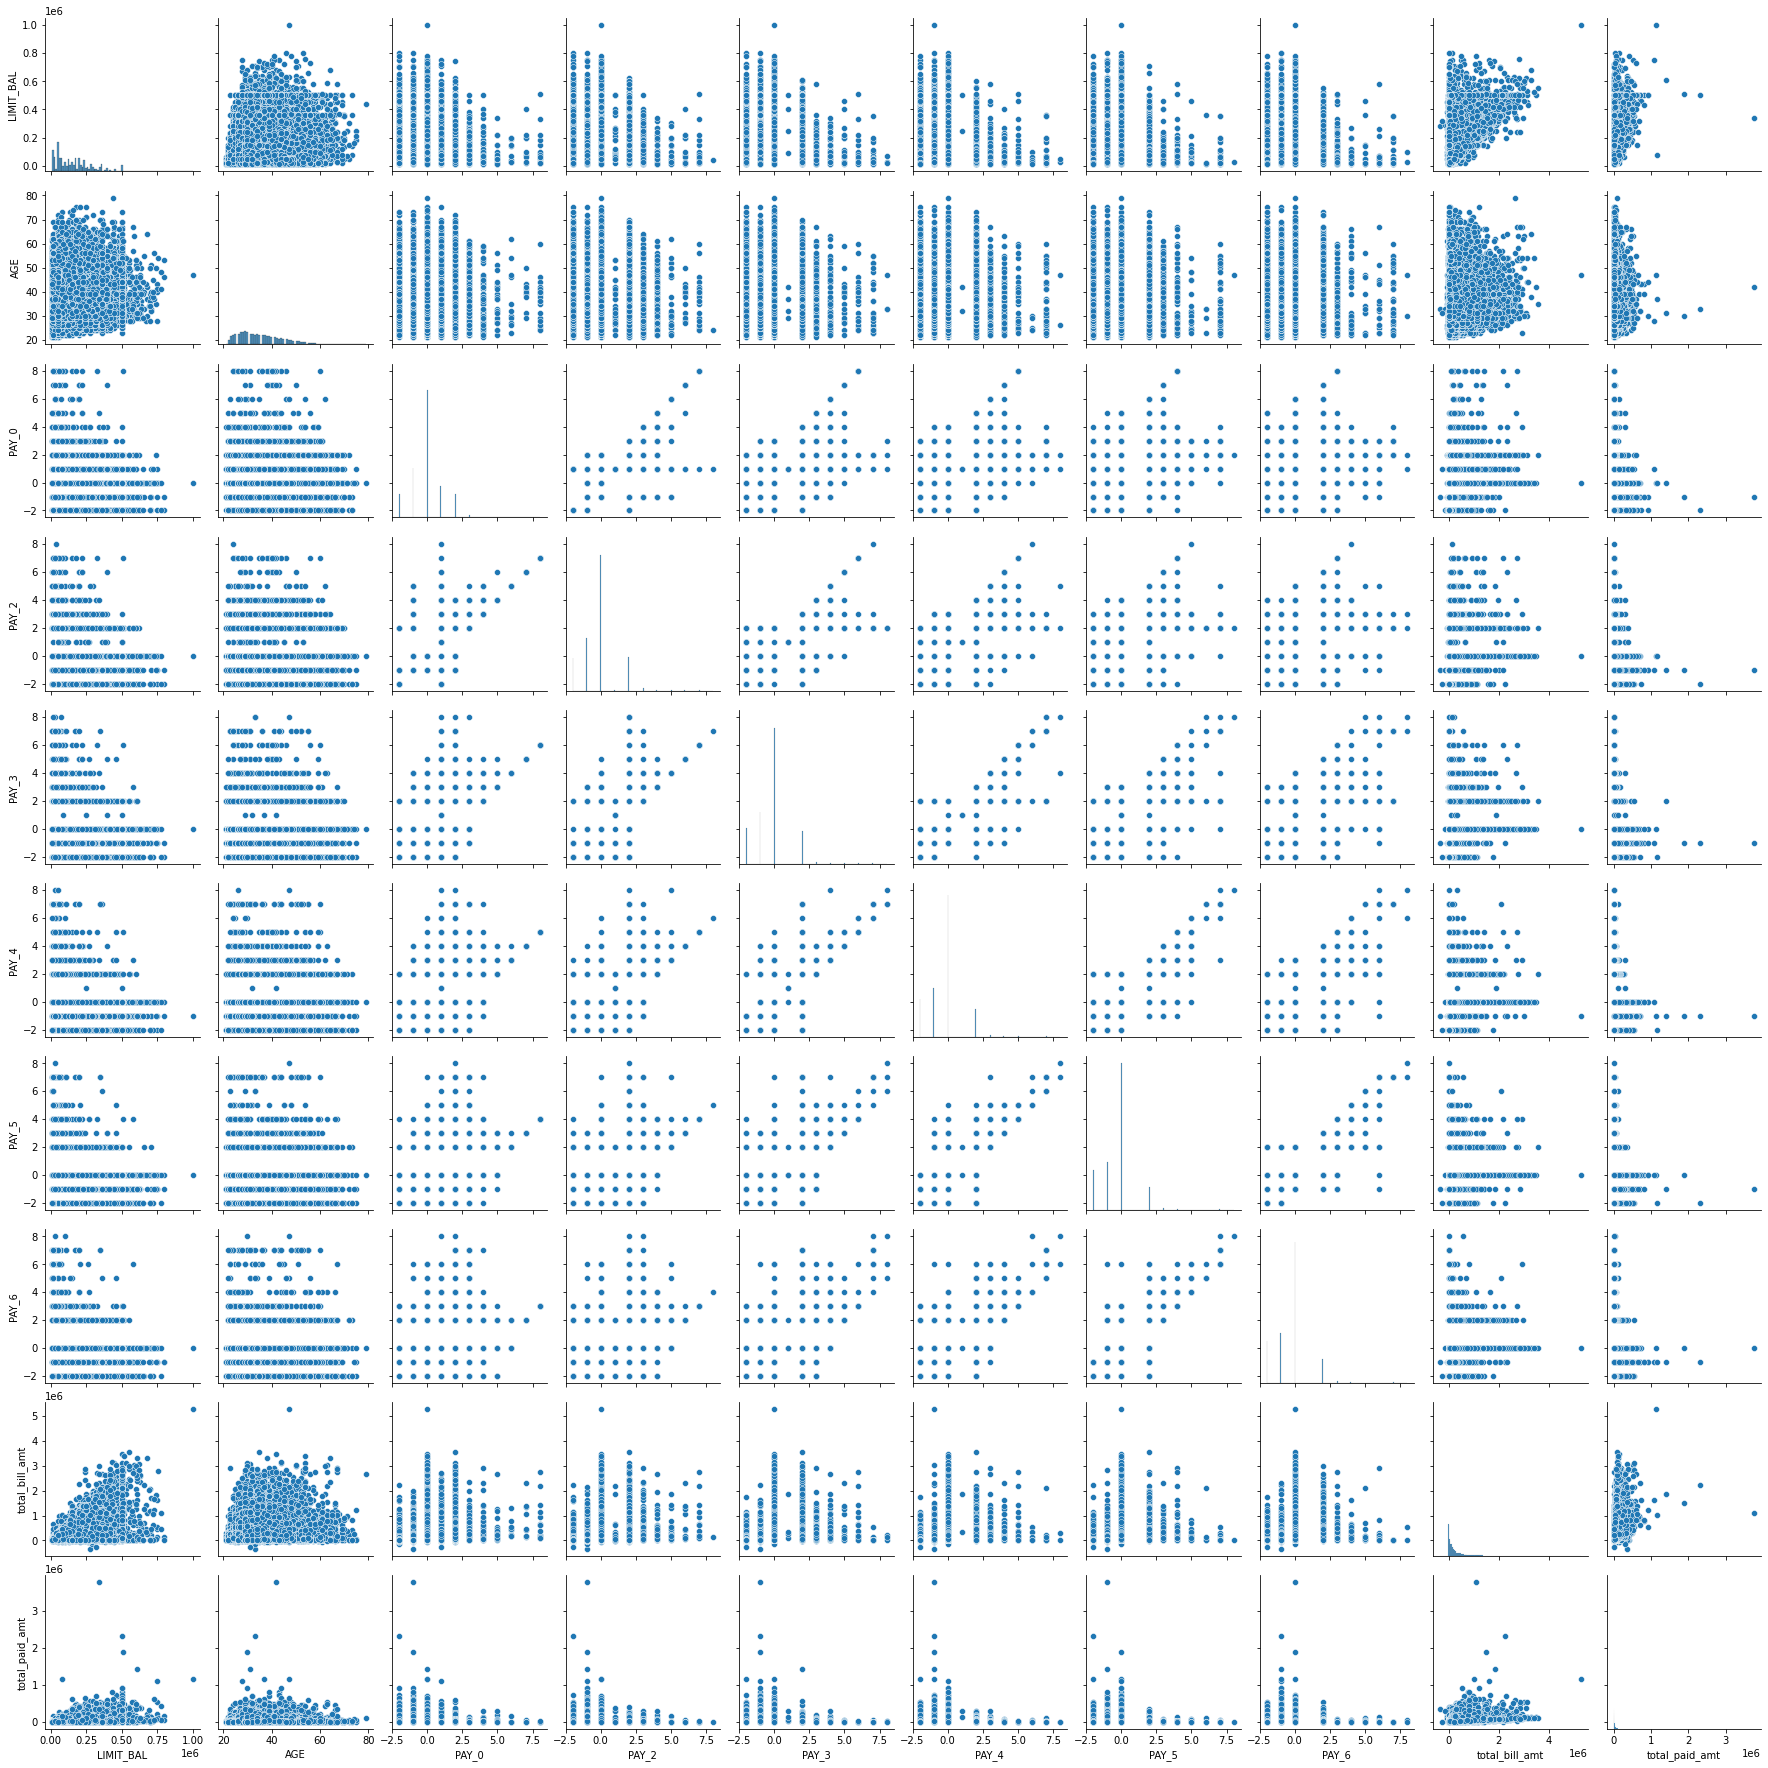

In [50]:
# Pair Plot visualization code
# pair_cols = ['LIMIT_BAL','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',
#              'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
pair_cols1 = ['LIMIT_BAL','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','total_bill_amt','total_paid_amt']
sns.pairplot(defaultVisualization.df1[pair_cols1])
plt.show()

##### 1. Why did you pick the specific chart?

Pair chart shows relationship between different variables which is very helpful for selecting right pair of the features.

##### 2. What is/are the insight(s) found from the chart?

I did not found there any linear relationship except few columns like pay_0,pay_2, pay_3 to pay_6.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. Customers who are predicted as defaulter has average limit balance is 130109
2. Average age for defaulter and non defaulter is same that is 35.
3. Total bill amount for defaulter and non defaulter is same 272428

* z_proportion = (p_hat-p)/sqrt(pq/n)
* z_mean = (sample_mean - population_mean)/(sigma/sqrt(n))
* z_variance(chi2) = ((n-1)square(s))/square(sigma)

In [51]:
# Funcction for calculaing z_proportion, z_mean, z_variance, normal_cdf, p_value and conclusion
from numpy import math
from scipy.stats import norm,ttest_1samp,ttest_ind
def z_proportion(p_hat,p,n):
  '''
  Takes p_hat and p then calculate z proportion
  '''
  return (p_hat-p)/math.sqrt((p*(1-p))/n)

def z_mean(s_mean,p_mean,sigma,n):
  '''
  Takes sample mean, population mean,sigma and size then calculate z mean
  '''
  return (s_mean-p_mean)/(sigma/math.sqrt(n))

def z_variance(s,sigma,n):
  '''
  Takes standart daviation , sigma and n. Returns z variance.
  '''
  return ((n-1)*s**2)/sigma**2


def get_norm_cdf(x):
  return norm(0,1).cdf(x)


def p_value(z,tail,hn,df,col,t=0):
  if t!=1:
    get_norm_cdf(z)
    if tail =='l':
      return z
    elif tail == 'r':
      return 1-z
    elif tail == 'd':
      if z>0.5:
        return 2*(1-z)
      else:
        return 2*z
    else:
      return np.nan
  else:
    z,p_value = ttest_1samp(df[col],hn) 
    return p_value


def conclusion(p):
  significance_level = 0.05
  if p > significance_level:
    print('Failed to reject null hypothesis for p_value :',p)
  else:
    print('Null hypothesis is rejected successfully for p_value :',p)

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

*Customers who are predicted as defaulter has average limit balance is equal to 130109*

* Null hypothesis : H0: mean = 130109
* Alternative hypothesis: H1: != 130109.

#### 2. Perform an appropriate statistical test.

In [52]:
# Perform Statistical Test to obtain P-Value
df = defaultVisualization.df.copy()
hypo1 = df[df['default']==1]
# Get required parameters
sample_mean = hypo1['LIMIT_BAL'].mean()
hno = 130109
n = len(hypo1)
std = hypo1['LIMIT_BAL'].std()

In [53]:
# Get the z value
z = z_mean(sample_mean,hno,std,n)
# Get the p_value
p = p_value(z,'d',hno,hypo1,'LIMIT_BAL',1)
# Printing the conclusion
conclusion(p)

Failed to reject null hypothesis for p_value : 0.9996302285951035


##### Which statistical test have you done to obtain P-Value?

I have used t_test to get p value and null hypothesis is failed to get rejected. Therefore the average limit balance for defaulter is 130109.

##### Why did you choose the specific statistical test?

In [54]:
# get the mean and median
print('Mean :',hypo1['LIMIT_BAL'].mean())
print('Median :',hypo1['LIMIT_BAL'].median())

Mean : 130109.65641952984
Median : 90000.0


Since mean and median of the sample is not close to each other therefore I choosed t_test.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Average age for defaulter and non defaulter is same that is 35.**
* Null Hypothesis = H0:mean age of defaulter = mean age of non defaulter
* Alternative Hypothesis = H1:mean age of defaulter != mean age of non defaulter

#### 2. Perform an appropriate statistical test.

In [55]:
# Perform Statistical Test to obtain P-Value
samp1 = df[df['default']==1]
samp2 = df[df['default']==0]
stat,p = ttest_ind(samp1['AGE'],samp2['AGE'],alternative='two-sided',equal_var=False)

In [56]:
if (p<0.025) & (p > .975):
  print('Failed to reject null hypothesis for p_value :',p)
else:
  print('Null hypothesis is successfully rejected for p_value :',p)

Null hypothesis is successfully rejected for p_value : 0.02038649025587463


##### Which statistical test have you done to obtain P-Value?

I have done t_test statistic and Null hypothesis is successfully rejected for 0.020 p_value.

##### Why did you choose the specific statistical test?

In [57]:
# Sample variance
print('samp1 ',(samp1['AGE'].std())**2)
print('samp2 ',(samp2['AGE'].std())**2)

samp1  93.96274964308311
samp2  82.3983681438325


I have used t_test because the variance of the two samples were not equal.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Mean of Total bill amount for defaulter and non defaulter is same 272428**

#### 2. Perform an appropriate statistical test.

In [58]:
# Perform Statistical Test to obtain P-Value
df1 = defaultVisualization.df1.copy()
samp1 = df1[df1['default']==1]
samp2 = df1[df1['default']==0]
stat,p = ttest_ind(samp1['total_bill_amt'],samp2['total_bill_amt'],alternative='two-sided',equal_var=False)

In [59]:
if (p<0.025) & (p > .975):
  print('Failed to reject null hypothesis for p_value :',p)
else:
  print('Null hypothesis is successfully rejected for p_value :',p)

Null hypothesis is successfully rejected for p_value : 0.02982393146535634


##### Which statistical test have you done to obtain P-Value?

I have used t_test to get p_value and null hypothesis is successfully rejected for 0.029 p value.

##### Why did you choose the specific statistical test?

In [60]:
# Sample variance
print('samp1 ',(samp1['total_bill_amt'].std())**2)
print('samp2 ',(samp2['total_bill_amt'].std())**2)

samp1  148818905456.67786
samp2  142696520235.93457


Variance of the two samples are not equal therefore I used t-test testing.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values - Not required

In [61]:
# Handling Missing Values & Missing Value Imputation
# No need to handle missing values.

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [62]:
# Handling Outliers & Outlier treatments

# Univariate outlier detection for column total_bill_amt
df2 = df1.copy()
print('Before outlier treatment',df2.shape)
# Isolation forest
outlier_detector = IsolationForest(contamination=.01,random_state=0)
outlier_detector.fit(df2)
# Predicting outliers and dropping them.
df2['outlier'] = outlier_detector.predict(df2)
df2 = df2[df2['outlier'] == 1]
df2.drop(columns=['outlier'],inplace=True)
print('After multi-variate outlier treatment',df2.shape)

Before outlier treatment (30000, 15)
After multi-variate outlier treatment (29700, 15)


##### What all outlier treatment techniques have you used and why did you use those techniques?

First of all I did uni-varaite outlier detection for column LIMIT_BAL using lower and upper bond then I did multi-variate analysis for all columns using random forest algorithm.

### 3. Categorical Encoding

In [63]:
# Encode your categorical columns
df2 = df1.copy()

# One hot encoding for EDUCATION
df2['EDUCATION_0'] = df2['EDUCATION'].apply(lambda x: 1 if x == 0 else 0)
df2['EDUCATION_1'] = df2['EDUCATION'].apply(lambda x: 1 if x == 1 else 0)
df2['EDUCATION_2'] = df2['EDUCATION'].apply(lambda x: 1 if x == 2 else 0)
df2['EDUCATION_3'] = df2['EDUCATION'].apply(lambda x: 1 if x == 3 else 0)
df2['EDUCATION_4'] = df2['EDUCATION'].apply(lambda x: 1 if x == 4 else 0)
df2['EDUCATION_5'] = df2['EDUCATION'].apply(lambda x: 1 if x == 5 else 0)
df2['EDUCATION_6'] = df2['EDUCATION'].apply(lambda x: 1 if x == 6 else 0)

# One hot encoding for MARRIAGE
df2['MARRIAGE_0'] = df2['MARRIAGE'].apply(lambda x : 1 if x == 0 else 0)
df2['MARRIAGE_1'] = df2['MARRIAGE'].apply(lambda x : 1 if x == 1 else 0)
df2['MARRIAGE_2'] = df2['MARRIAGE'].apply(lambda x : 1 if x == 2 else 0)
df2['MARRIAGE_3'] = df2['MARRIAGE'].apply(lambda x : 1 if x == 3 else 0)

# droping columns
df2.drop(columns=['MARRIAGE','EDUCATION'], inplace=True)

#### What all categorical encoding techniques have you used & why did you use those techniques?

I did one hot encoding for columns Education and Marriage. I decided to use one hot encoding technique because this technique is not biased.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [64]:
# Manipulate Features to minimize feature correlation and create new features

#Multicollinearity
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
# Columns with high vif
high_vif_list = ['ID','default','MARRIAGE_2','EDUCATION_2','AGE']
# Multicolinearitiy check
calc_vif(df2[[i for i in df2.describe().columns if i not in high_vif_list ]])

,variables,VIF
0,LIMIT_BAL,3.942807
1,SEX,3.502520
2,PAY_0,1.912170
3,PAY_2,3.152134
4,PAY_3,3.643958
5,PAY_4,4.345809
6,PAY_5,4.856659
7,PAY_6,3.353348
8,total_bill_amt,2.176032
9,total_paid_amt,1.587237


#### 2. Feature Selection

In [65]:
# Select your features wisely to avoid overfitting

col_to_keep = ['LIMIT_BAL','SEX','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6',
               'EDUCATION_0','EDUCATION_1','EDUCATION_3','EDUCATION_4','EDUCATION_5','EDUCATION_6',
               'MARRIAGE_0','MARRIAGE_1','MARRIAGE_3','total_bill_amt','total_paid_amt','default']

##### What all feature selection methods have you used  and why?

I used vif_score to know what all important features because variance inflation factor shows how features are correlated with each other.


##### Which all features you found important and why?

I choosed these features because their vif scores are less than 6.
* LIMIT_BAL
* SEX
* PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
* EDUCATION_0,EDUCATION_1,EDUCATION_3,EDUCATION_4,EDUCATION_5 and EDUCATION_6
* MARRIAGE_0,MARRIAGE_1,MARRIAGE_3
* total_bill_amt
* total_paid_amt
* default

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [66]:
# # Log transformation
# df3 = df2.copy()
# df3['total_paid_amt'] = np.log10(df3['total_paid_amt']+1)
# df3['LIMIT_BAL'] = np.log10(df3['LIMIT_BAL']+1)

In [67]:
# Log transformation
df3 = df2[col_to_keep].copy()
df3['total_paid_amt'] = np.log10(df3['total_paid_amt']+1)
df3['LIMIT_BAL'] = np.log10(df3['LIMIT_BAL']+1)

In my case data transformation is not needed I tried after and before data transformation I am getting same results but my above columns are not close to normal distributions that is the reason behind doing data transformation.

### 6. Data Scaling

In [68]:
# Scaling your data
col_to_scale = ['LIMIT_BAL','total_bill_amt','total_paid_amt']
scaled_values = MinMaxScaler().fit_transform(df3[col_to_scale])
for col in range(len(col_to_scale)):
    df3[col_to_scale[col]] = scaled_values[:,col]

In [69]:
# X and Y variables
X = df3.drop(columns=['default']).values
y = df3['default'].values

##### Which method have you used to scale you data and why?

I used minmax scaler to scale my data because my data is not following normal distribution and form minmax scaler I just need to know min and max values.

### 7. Dimesionality Reduction - We have very limited features therefore it does not requires dimentionality reduction.

##### Do you think that dimensionality reduction is needed? Explain Why?

Dimentionality reduction is not needed.

In [70]:
# # DImensionality Reduction (If needed)
# from sklearn.decomposition import PCA
# pca = PCA(n_components=18,random_state=1)
# X = pca.fit(X)
# pca.explained_variance_ratio_

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [71]:
# Split your data to train and test. Choose Splitting ratio wisely.

xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=.2,random_state=0)

##### What data splitting ratio have you used and why? 

I took 20% for testing and 80% for training purpose because I have very limited amount of data and we need huge amount of data for making a better model.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

In [72]:
# Get number of observations for each catagory
df['default'].value_counts()

0    23364
1     6636
Name: default, dtype: int64

Yes, 23,364 observations are from class 0 and only 6636 are from class 1 therefore our dataset is not balanced we will have to make the dataset balance else it might show better accuracy score but in real the accuracy might be wrong or the model will learn nothing.

In [73]:
# Handling Imbalanced Dataset (If needed)

smote = SMOTE(random_state=0)
xsmote,ysmote =smote.fit_resample(xtrain,ytrain)
xtrain,xtest,ytrain,ytest = train_test_split(xsmote,ysmote,random_state=0,test_size=.2)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

I am using SMOTE technique to make my dataset balanced. Since I have only limited amount of data  therefore I cannot use under sampling therefore I am using over sampling using smote algorith because  this algorithm make dummy data same like real observations.

## ***7. ML Model Implementation***

#### Function to display matrix.

In [74]:
# Function to show confusion metrics
def show_cm(cm,label=''):
  try:
    labels = ['Normal','Default']
    sns.heatmap(cm,annot=True,cmap='coolwarm',fmt='d')
    plt.title(label+' Confusion matrix')
    plt.show()
  except:
    print('Invalid input')

# Function for displaying train and test confusion matrix
def trainTestReport(pred_train,pred_test,ytrain=ytrain,ytest=ytest):
  try:
    plt.rcParams['figure.figsize'] = (8,2)
    # Get the accuracy scores
    train_accuracy = accuracy_score(pred_train,ytrain)
    test_accuracy = accuracy_score(pred_test,ytest)
    print('The accuracy score on train data is :',train_accuracy)
    print('The accuracy score on test data is :',test_accuracy)
    print('')
    
    # Confusion matrix for train
    cm = confusion_matrix(ytrain,pred_train)
    show_cm(cm,'Train')
    print('')
    # Confusion matrix for test
    cm = confusion_matrix(ytest,pred_test)
    show_cm(cm,'Test')
    print('')

    # Prediction report for Train
    print('For Train Data')
    print(metrics.classification_report(ytrain,pred_train))
    print('roc_auc score :',roc_auc_score(ytrain, pred_train))
    print('\n\n')
    # Prediction report for Test
    print('For Test Data')
    print(metrics.classification_report(ytest,pred_test))
    print('roc_auc score :',roc_auc_score(ytest, pred_test))
  except:
    print('Invalid inpput !')

### ML Model - 1 - Logistic Regression

In [75]:
# ML Model - 1 Implementation
logisticRegression = LogisticRegression(random_state=0)

# Fit the Algorithm
logisticRegression.fit(xtrain,ytrain)

# Predict on the model
pred_train = logisticRegression.predict(xtrain)
pred_test = logisticRegression.predict(xtest)

# Checking coefficients of the model
logisticRegression.coef_

array([[-0.67759839, -0.09444812,  0.42331804,  0.11967001,  0.09801253,
         0.05388922,  0.04820477,  0.04093926, -0.81921009,  0.0684299 ,
        -0.10536194, -0.83165857, -1.37924512, -0.49401866, -1.38032726,
         0.24611378, -0.16623255, -0.47016744, -2.68667857]])

In [76]:
# Checking Intercept
logisticRegression.intercept_

array([1.96851845])

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The accuracy score on train data is : 0.6892521016846971
The accuracy score on test data is : 0.6973878097789685



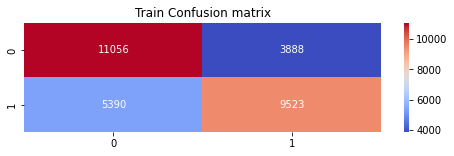

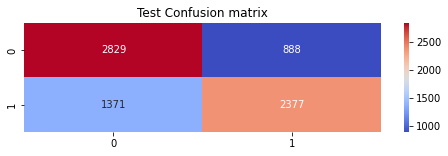


For Train Data
              precision    recall  f1-score   support

           0       0.67      0.74      0.70     14944
           1       0.71      0.64      0.67     14913

    accuracy                           0.69     29857
   macro avg       0.69      0.69      0.69     29857
weighted avg       0.69      0.69      0.69     29857

roc_auc score : 0.6891995343154464



For Test Data
              precision    recall  f1-score   support

           0       0.67      0.76      0.71      3717
           1       0.73      0.63      0.68      3748

    accuracy                           0.70      7465
   macro avg       0.70      0.70      0.70      7465
weighted avg       0.70      0.70      0.70      7465

roc_auc score : 0.6976512843438479


In [77]:
# Visualizing evaluation Metric Score chart
trainTestReport(pred_train,pred_test)

1. Logististic Regression is very simple machine learning algorithm for classification. The model is so simple therefore it is not able to leanrn complexity of the dataset and giving poor accuracy.
2. Result for the Train data : 
  * Accuracy .69
  * TP: 9523 and TN: 11056
  * FP: 3888 and FN: 5390
  * precision for class_0 is .67 and for class_1 is .71
  * recall for class_0 .74 and for class_1 is .64
3. Result for the Test data:
  * Accuracy .69
  * TP: 2377 and TN: 2829
  * FP: 888 and FN: 1371
  * precision for class_0 is .67 and for class_1 is .73
  * recall for class_0 .76 and for class_1 is .63
  4. Since all the scores of train data is very close to train data therefore the model is not overfitting.

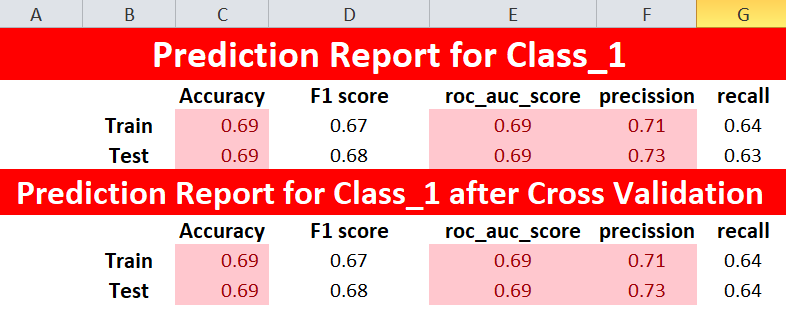

#### 2. Cross- Validation & Hyperparameter Tuning

In [78]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

grid_param = {'C': [200,20],'random_state':[1],'penalty':['l2'],'max_iter':[2000]}
# grid_param = {'var_smoothing': np.arange(1e-9,1,.1)}
logisticGrid = GridSearchCV(logisticRegression,param_grid=grid_param,cv=50,scoring='f1',verbose=2)
# Fit the Algorithm
logisticGrid.fit(xtrain,ytrain)
bestLogisticEstimator = logisticGrid.best_estimator_
# Predict on the model
pred_train = bestLogisticEstimator.predict(xtrain)
pred_test = bestLogisticEstimator.predict(xtest)

Fitting 50 folds for each of 2 candidates, totalling 100 fits
[CV] END ...C=200, max_iter=2000, penalty=l2, random_state=1; total time=   0.8s
[CV] END ...C=200, max_iter=2000, penalty=l2, random_state=1; total time=   1.4s
[CV] END ...C=200, max_iter=2000, penalty=l2, random_state=1; total time=   0.9s
[CV] END ...C=200, max_iter=2000, penalty=l2, random_state=1; total time=   0.8s
[CV] END ...C=200, max_iter=2000, penalty=l2, random_state=1; total time=   1.1s
[CV] END ...C=200, max_iter=2000, penalty=l2, random_state=1; total time=   1.0s
[CV] END ...C=200, max_iter=2000, penalty=l2, random_state=1; total time=   1.2s
[CV] END ...C=200, max_iter=2000, penalty=l2, random_state=1; total time=   0.8s
[CV] END ...C=200, max_iter=2000, penalty=l2, random_state=1; total time=   0.9s
[CV] END ...C=200, max_iter=2000, penalty=l2, random_state=1; total time=   0.9s
[CV] END ...C=200, max_iter=2000, penalty=l2, random_state=1; total time=   1.3s
[CV] END ...C=200, max_iter=2000, penalty=l2, r

In [79]:
# Get best paramets
logisticGrid.best_params_

{'C': 20, 'max_iter': 2000, 'penalty': 'l2', 'random_state': 1}

The accuracy score on train data is : 0.6894865525672371
The accuracy score on test data is : 0.6979236436704621



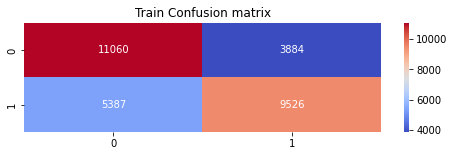

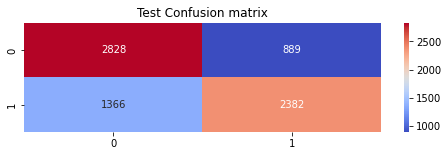


For Train Data
              precision    recall  f1-score   support

           0       0.67      0.74      0.70     14944
           1       0.71      0.64      0.67     14913

    accuracy                           0.69     29857
   macro avg       0.69      0.69      0.69     29857
weighted avg       0.69      0.69      0.69     29857

roc_auc score : 0.6894339506755167



For Test Data
              precision    recall  f1-score   support

           0       0.67      0.76      0.71      3717
           1       0.73      0.64      0.68      3748

    accuracy                           0.70      7465
   macro avg       0.70      0.70      0.70      7465
weighted avg       0.70      0.70      0.70      7465

roc_auc score : 0.6981837896721315


In [80]:
# Get prediction report
trainTestReport(pred_train,pred_test)

##### Which hyperparameter optimization technique have you used and why?

I am using these parametere:
* C - To get more accurate score.
* random_state - To avoid different results for each run.
* penalty - To regulate coefficients.
* max_iter - To limit number of iterations.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

As we can see the results before and after cross validation is same therefore I did not find any improvement.

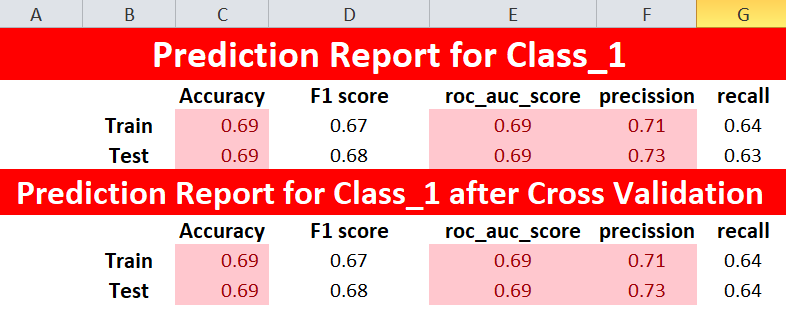

### ML Model - 2 - Decission Tree Classifier

In [81]:
# ML Model - 2 Implementation
decisionTreeClassifier = DecisionTreeClassifier(random_state=0)
# Fit the Algorithm
decisionTreeClassifier.fit(xtrain,ytrain)
# Predict on the model
pred_train = decisionTreeClassifier.predict(xtrain)
pred_test = decisionTreeClassifier.predict(xtest)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The accuracy score on train data is : 0.9974545332752788
The accuracy score on test data is : 0.7442732752846618



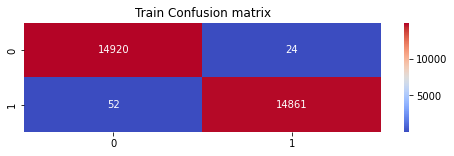

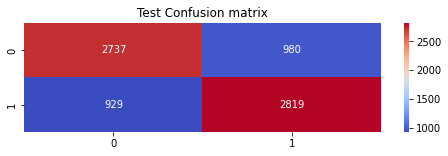


For Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14944
           1       1.00      1.00      1.00     14913

    accuracy                           1.00     29857
   macro avg       1.00      1.00      1.00     29857
weighted avg       1.00      1.00      1.00     29857

roc_auc score : 0.9974535568251605



For Test Data
              precision    recall  f1-score   support

           0       0.75      0.74      0.74      3717
           1       0.74      0.75      0.75      3748

    accuracy                           0.74      7465
   macro avg       0.74      0.74      0.74      7465
weighted avg       0.74      0.74      0.74      7465

roc_auc score : 0.7442404938628914


In [82]:
# Get prediction report
trainTestReport(pred_train,pred_test)

1. Desicion Tree is very good choice when the patterns of the data is not understandable or not linear but problem is that Decision tree alway try to find next best split therefore it leads the model towards overfitting.
2. Result for the Train data : 
  * Accuracy .99
  * TP: 14861 and TN: 14920
  * FP: 24 and FN: 52
  * precision for class_0 is 1.00 and for class_1 is 1.00
  * recall for class_0 1.00 and for class_1 is 1.00
3. Result for the Test data:
  * Accuracy .74
  * TP: 2819 and TN: 2737
  * FP: 980 and FN: 929
  * precision for class_0 is .75 and for class_1 is .74
  * recall fpr class_0 .74 and for class_1 is .75
  4. Since all scores for train data are much higher than test data therefore the model is overfitting.

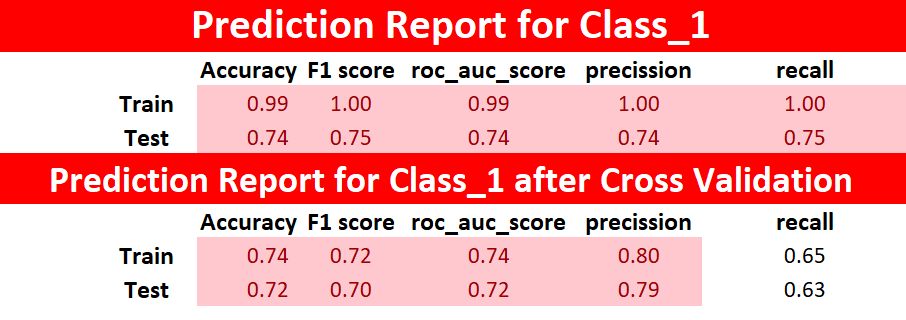

#### 2. Cross- Validation & Hyperparameter Tuning

In [83]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fitting Decision Tree
grid_param = {'max_depth' : [2,3,4,5,6,7,8,9], 'min_samples_leaf' : [3,4,5,6,7],'min_samples_split':[4]}
dtcGrid = GridSearchCV(decisionTreeClassifier,param_grid=grid_param,cv=10,verbose=2)
# Fit the Algorithm
dtcGrid.fit(xtrain,ytrain)
bestDtcEstimator = dtcGrid.best_estimator_
# Predict on the model
pred_train = bestDtcEstimator.predict(xtrain)
pred_test = bestDtcEstimator.predict(xtest)

Fitting 10 folds for each of 40 candidates, totalling 400 fits
[CV] END max_depth=2, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=4, min_samples_split=4; total time=   0.0s
[CV] END max_depth=2, min_samples_l

In [84]:
dtcGrid.best_params_

{'max_depth': 9, 'min_samples_leaf': 3, 'min_samples_split': 4}

The accuracy score on train data is : 0.7453193555950028
The accuracy score on test data is : 0.7288680509042197



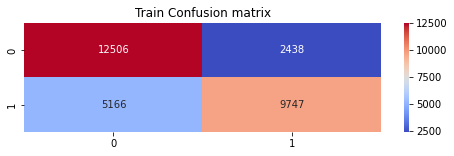

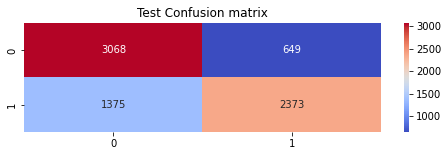


For Train Data
              precision    recall  f1-score   support

           0       0.71      0.84      0.77     14944
           1       0.80      0.65      0.72     14913

    accuracy                           0.75     29857
   macro avg       0.75      0.75      0.74     29857
weighted avg       0.75      0.75      0.74     29857

roc_auc score : 0.7452242142542378



For Test Data
              precision    recall  f1-score   support

           0       0.69      0.83      0.75      3717
           1       0.79      0.63      0.70      3748

    accuracy                           0.73      7465
   macro avg       0.74      0.73      0.73      7465
weighted avg       0.74      0.73      0.73      7465

roc_auc score : 0.7292672494113261


In [85]:
# Get prediction report
trainTestReport(pred_train,pred_test)

##### Which hyperparameter optimization technique have you used and why?

Hyper parameters I used are blow :
* max_depth : This parameter is useful to stop overfittng and do not let the tree be grown further than the fixed limit.
* min_samples_leaf : This hyper parameter is useful when we want to set a minimum leaf of a branch, it will not split further if the number of leaf is less than the set value.
* min_sample_split : To avoid overfitting.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

1. Yes, before the model was overfittng but after cross validation our train accuracy decreased from 99% to 74% and test accuracy from 74% to 72%.
##### These scores are only for class_1
2. Train f1_score decreased from 100% to 72% and test score from 75% to 70%.
3. Train roc_auc decreased form 99% to 74% and Test roc_auc from 74% to 72%.
4. Train precision decreased from 100% to 80% and Test precision increased from 74% to 79%.
5. Train recall is decreased from 100% to 65% and test recall is from 75% to 63%.
6. The model is now not overfitting and this model is better than before cross validation.

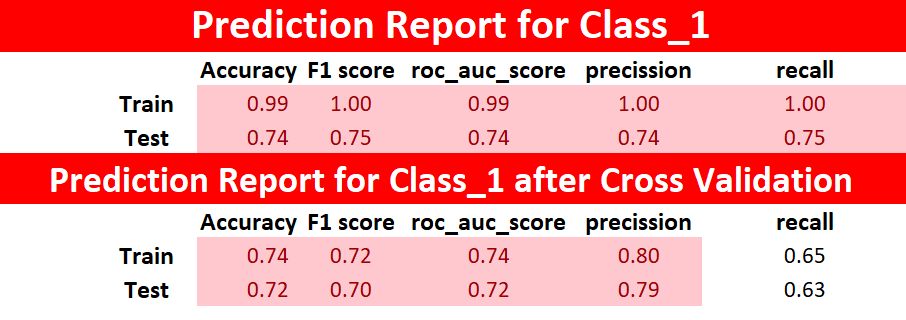

### ML Model - 3 - XGBoostClassifier

In [86]:
# ML Model - 3 Implementation
xgbClassifier = XGBClassifier(random_state=0)
# Fit the Algorithm
xgbClassifier.fit(xtrain,ytrain)
# Predict on the model
pred_train = xgbClassifier.predict(xtrain)
pred_test = xgbClassifier.predict(xtest)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The accuracy score on train data is : 0.7731855176340556
The accuracy score on test data is : 0.7729403884795714



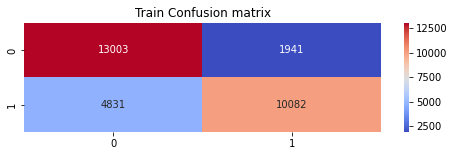

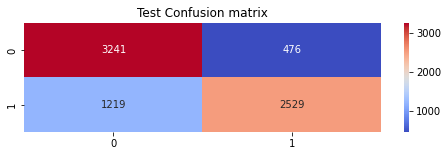


For Train Data
              precision    recall  f1-score   support

           0       0.73      0.87      0.79     14944
           1       0.84      0.68      0.75     14913

    accuracy                           0.77     29857
   macro avg       0.78      0.77      0.77     29857
weighted avg       0.78      0.77      0.77     29857

roc_auc score : 0.7730847727490393



For Test Data
              precision    recall  f1-score   support

           0       0.73      0.87      0.79      3717
           1       0.84      0.67      0.75      3748

    accuracy                           0.77      7465
   macro avg       0.78      0.77      0.77      7465
weighted avg       0.78      0.77      0.77      7465

roc_auc score : 0.7733498041391065


In [87]:
# Get prediction report
trainTestReport(pred_train,pred_test)

1. Here I am using XGBoost Classifier model to build the model as I got there good result.

2. Result for the Train data : 
  * Accuracy .77
  * TP: 10082 and TN: 13003
  * FP: 1941 and FN: 4831
  * precision for class_0 is .73 and for class_1 is .84
  * recall for class_0 .87 and for class_1 is .68
3. Result for the Test data:
  * Accuracy .77
  * TP: 2529 and TN: 3241
  * FP: 476 and FN: 1219
  * precision for class_0 is .73 and for class_1 is .84
  * recall fpr class_0 .87 and for class_1 is .67
  4. Since all scores for train data are very close to test data then we can say that the  model is not overfitting.

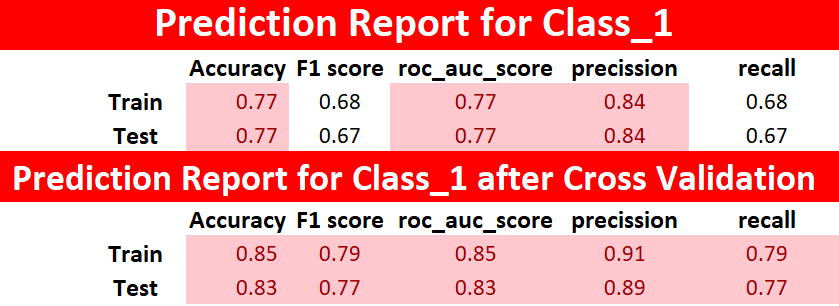

#### 2. Cross- Validation & Hyperparameter Tuning

In [88]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
grid_param = {'n_estimators':[160],'max_depth' : [6]}
xgbClassifierGrid= GridSearchCV(xgbClassifier, param_grid=grid_param,cv=3, verbose=2)
# Fit the Algorithm
xgbClassifierGrid.fit(xtrain,ytrain)
bestXgbClassifierEstimator = xgbClassifierGrid.best_estimator_
# Predict on the model
pred_train = bestXgbClassifierEstimator.predict(xtrain)
pred_test = bestXgbClassifierEstimator.predict(xtest)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END ......................max_depth=6, n_estimators=160; total time=   3.7s
[CV] END ......................max_depth=6, n_estimators=160; total time=   3.7s
[CV] END ......................max_depth=6, n_estimators=160; total time=   3.7s


In [89]:
# Get the best parameters
xgbClassifierGrid.best_params_

{'max_depth': 6, 'n_estimators': 160}

The accuracy score on train data is : 0.856717017784774
The accuracy score on test data is : 0.8384460817146685



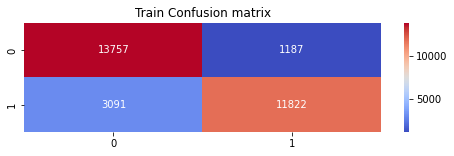

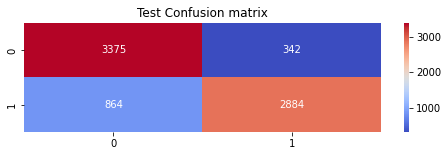


For Train Data
              precision    recall  f1-score   support

           0       0.82      0.92      0.87     14944
           1       0.91      0.79      0.85     14913

    accuracy                           0.86     29857
   macro avg       0.86      0.86      0.86     29857
weighted avg       0.86      0.86      0.86     29857

roc_auc score : 0.8566506513115111



For Test Data
              precision    recall  f1-score   support

           0       0.80      0.91      0.85      3717
           1       0.89      0.77      0.83      3748

    accuracy                           0.84      7465
   macro avg       0.85      0.84      0.84      7465
weighted avg       0.85      0.84      0.84      7465

roc_auc score : 0.8387336845995024


In [90]:
# Get prediction report
trainTestReport(pred_train,pred_test)

##### Which hyperparameter optimization technique have you used and why?

***I have used the hyperparameters are given below:***
1. max_depth : To avoid overfitting
2. n_estimators : To control accuracy

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, I have seen improvements in the model after applying cross validation. The Improvement report is given below.

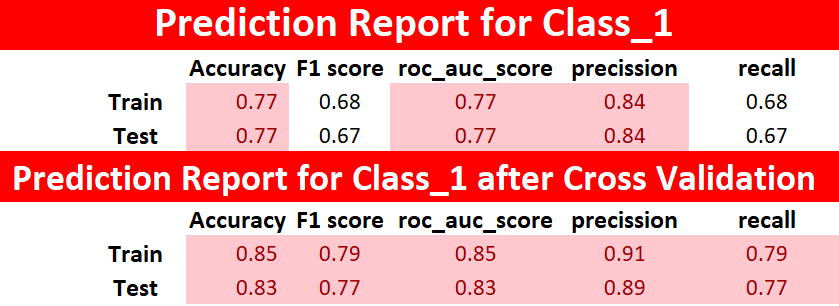

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I would like to go with recall, precision and f1_score but recall is our main matrix which matters most in this case because we do not want to predict a default customer as non default because it may cause huge lose in the business.
1. To reduced false negative recall is and false positive precision is very important for us to minimize them.
2. False negative is defined as the model predicted non defaulter but actually it is defaulter and false positive is defined as the model predicted defaulter but in real those are non defaulter.
3. In our case recall is very important because any single customer who is left from predicting defaulter but in acrual that customer is defaulter it may lead to very big lose for our business. Therefore our recall should be higher and precision can not  be neglected too and our f1_score should be moderate.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

**Here I would like to go with XGBoost Classifier**
1. First of we need good  accuracy and for better accuracy I tried Logistic regression, Decision tree and XGBoost.
2. Since XGBoost is giving best accuracy therfore I would like to choose XGBoost.
3. From the score card we can see XGBoost is giving best accuracy.
4. Scores for all models are below.

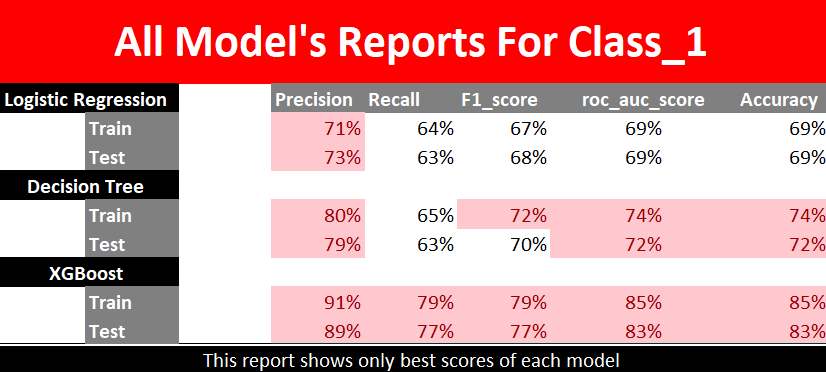

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [91]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [92]:
import shap
explainer = shap.Explainer(bestXgbClassifierEstimator)
shap_values = explainer(xtest)

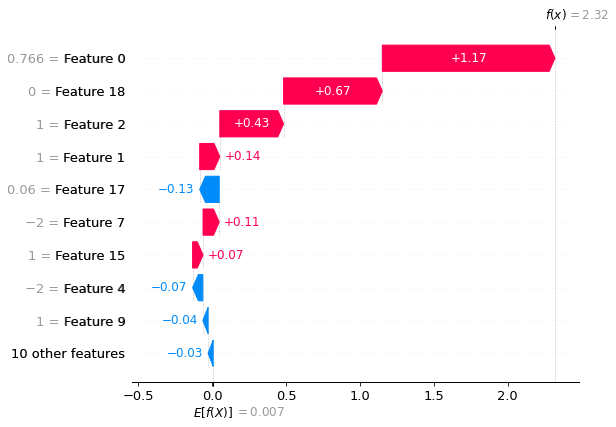

In [93]:
shap.plots.waterfall(shap_values[0])

In [94]:
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# Forceplot for first observation
shap.plots.force(shap_values[0])

Waterfall and force plot shows impact of  features for dragging prediction from base value to the prediction value.

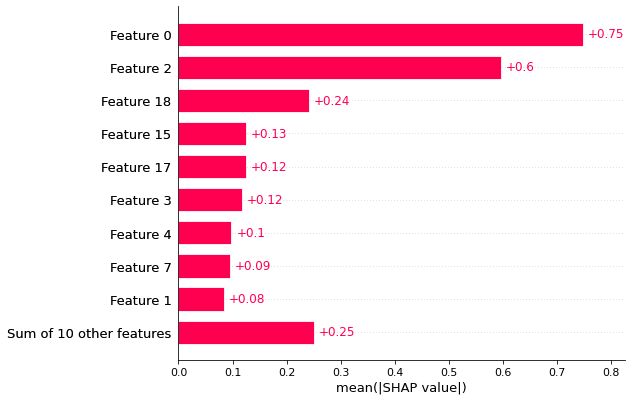

In [95]:
shap.plots.bar(shap_values)

Bar chart shows the feature's weights. Longer the bar are has more impact for making prediction. 

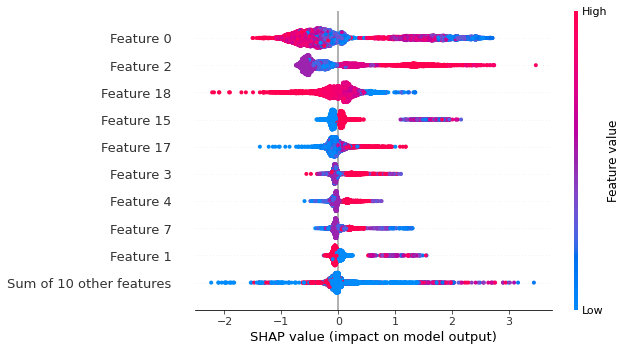

In [96]:
shap.plots.beeswarm(shap_values)

Beeswarm shows the relationship of features for making prediction.

In [97]:
pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [98]:
import eli5
eli5.show_weights(bestXgbClassifierEstimator)

Weight,Feature
0.3061,f2
0.1031,f0
0.0569,f15
0.0501,f3
0.0478,f4
0.0473,f1
0.0472,f12
0.0424,f9
0.0406,f16
0.0403,f7


From above chart we can see how the features are important for prediction like feature 2 has the highest weight therefore this feature has most impact for making prediction.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [99]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [100]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

1. Columns' name of the dataset  were not meaningfull therefore I renamed them.
2. Data type of the columns were not in or float type therefore I converted them into int type.
3. BILL_AMT 1 to 6 can be deleted and made new column total bill amt and also PAY_AMT 1 to 6 can be deleted and made new column total paid amt.
4. 22.1% of the total customers are predicted as default and 77.9% of them are predicted as non defalut.
5. 60.4% of total customers are belonging from gender 2 and 39.6% are from gender 1.
6. We can deploy the model with XGBoost algorithm because for precision for training data 94% for testing data 93%, recall for training data 83% for testing data 81%, f1_score for training data is 88% for testing data 87%, roc_auc_score for training data 88% for testing data 87% and accuracy for training data is 89% for testing data 88%.
7. No overfitting is seen.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***